# Exploring Monty Hall with cargoat

This post contains some vignettes demonstrating how [cargoat](https://github.com/earnestt1234/cargoat) can be used to simulate the [Monty Hall Problem](https://en.wikipedia.org/wiki/Monty_Hall_problem).

The examples used below are taken from an [Untrammeled Mind post](https://www.untrammeledmind.com/2018/11/monty-hall-problem-and-variations-intuitive-solutions/) which provides descriptions and mathematical formulations of several Monty Hall problem variations.  Because of the fantastic explanations in that existing post, these vignettes will not focus on re-deriving the same theoretical answers for these problems.  Rather, it will show that the same answers are supported empirically (while simultaneously showing how cargoat is used).  **Please read the Untrammeled Mind post for more thorough explanation and intuition.**

If there are any operations from cargoat that you have more questions about, make sure to check the [API documentation](https://earnestt1234.github.io/cargoat/cargoat/).

## 1. Classic Monty Hall (three doors)

Here's a restatement of the classic Monty Hall problem (directly quoted from Untrammeled Mind):

> You stand before three closed doors. The doors are evenly spaced and appear identical, aside from being numbered from 1 to 3. One of the doors conceals a car, while each of the other two doors conceals a goat. The host of this game, Monty Hall, asks you to select a door. If you select the car door, you get to keep the car. You select Door 1, hoping to win the car. But wait. Hall opens Door 2 to reveal a goat. Hall, who knows where the car is, always reveals a goat. (Also assume that, when a contestant chooses the car door, Hall chooses which of the two goat doors to open with equal probability.) You chose Door 1, but are now given the option to switch your guess to Door 3. What’s the probability of winning if you switch?

After Monty reveals a goat-containing door, is it better to switch to the remaining door or keep your original one?  This is the key question.  Again, here we will not work up an intuition for the answer to this question - rather, we are going to simulate the above scenario many times and see which behavior (switching doors or not) results in more wins (selecting the door with the car in it).

Let's start by importing cargoat.

In [1]:
import cargoat as cg

We will use this first, classic problem variation to spend a little more time learning how to use cargoat.  The basic setup for any game is as follows:

1. Create a list of game actions to perform.
2. Pass those to actions to `cargoat.play()` to simulate the game any number of times.

"Actions" are classes from the [`cargoat.actions`](https://earnestt1234.github.io/cargoat/cargoat/actions/index.html) subpackage.  They encode various typical things that are done in Monty Hall problem scenarios - placing cars and goats, picking doors, revealing doors, etc.

The first thing we need to do is tell cargoat how many doors, cars, and goats we want in our game.  In the classic setup, there are **2 goats** and **1 car**.  [There are a few actions which set up the doors](https://earnestt1234.github.io/cargoat/cargoat/actions/initialization.html) - here, we will use [`InitDoorsRandom()`](https://earnestt1234.github.io/cargoat/cargoat/actions/initialization.html#cargoat.actions.initialization.InitDoorsRandom), which randomly places a specified number of goats and cars.

Let's see just what initilization accomplishes.  We will simulate a game with just initilization for a small number of trials (5).  And for the purpose of this documentation, we will set a random seed so that we get the same results each time:

In [2]:
seed = 3
game = [cg.InitDoorsRandom(cars=1, goats=2)]

sim = cg.play(game, n=5, seed=seed)

The `sim` returned in the last line is a [object which keeps track of the simulation we just ran](https://earnestt1234.github.io/cargoat/cargoat/sim.html#cargoat.sim.MontyHallSim).  It is several methods & attributes for keeping track of the game.  The most important ones are `sim.cars`, `sim.picked`, and `sim.revealed`.  These are binary arrays which keep track of the game state over repeated trials.  The `show()` method will give a snapshot of their contents:

In [3]:
sim.show()

Trials: 0-4

Cars:
[[0 0 1]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]]

Revealed:
[[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]

Picked:
[[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]


Each of these arrays has 5 rows and 3 columns; the **number of rows correspond to the number of trials** being simulated (which we specified with `cg.play(game, n=5)`), while the **columns specifies the number of doors** in each simulation (2 goats + 1 car = 3 doors).

Looking at the "cars" array, we can see that initilization has started the game as we intended; each trial (row) has one car, as indicated by a single `1`.  

The "revealed" and "picked" arrays, on the other hand, only contain zeros.  These arrays keep track of which door(s) have been opened by Monty and which door(s) the player has selected.  We haven't added any actions that pick or open doors - let's do that now!  The next step of the game is for the player to choose a single door, which we can accomplish with the `Pick()` action:



In [4]:
game = [cg.InitDoorsRandom(cars=1, goats=2),
        cg.Pick()]

sim = cg.play(game, n=5, seed=seed)
sim.show()

Trials: 0-4

Cars:
[[0 0 1]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]]

Revealed:
[[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]

Picked:
[[0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]]


Now we see that one door has been picked per row, as well.  The default behavior of `Pick()` is to select a single door per trial - there are arguments which can alter the picking behavior which will be explored below.  Additionally, the door is picked *randomly*.  This is a small difference from the scenario described above, where the user always picks door #1.  Statistically, the two situations are equivalent, since the cars are also placed randomly.  To instead pick a specific door, you could have the second action as `cg.Pick(doors=[0])` (for the door at index 0).

We now need to add Monty revealing a door.  `Reveal()` is very similar to `Pick()`, but operates on the "revealed" array:

In [5]:
game = [cg.InitDoorsRandom(cars=1, goats=2),
        cg.Pick(),
        cg.Reveal()]

sim = cg.play(game, n=5, seed=seed)
sim.show()

Trials: 0-4

Cars:
[[0 0 1]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]]

Revealed:
[[0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]]

Picked:
[[0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]]


One door is revealed per row by default.  Furthermore, *none of the picked doors or doors containing cars have been revealed* - by default, actions in cargoat will try to keep such doors closed and throw an error if there is a problem doing so (more on this below).  Within these constraints, the doors are selected randomly.

Now the interesting part: it is time to decide to either switch or stay.  To assess which is better, we can run each choice in a separate simulation.  Cargoat has convenience classes `Switch()` and `Stay()` for modeling these actions, though note that switching is equivalent to calling `Pick()` again, and doing nothing would be equivalent to `Stay()`!

In [6]:
game = [cg.InitDoorsRandom(cars=1, goats=2),
        cg.Pick(),
        cg.Reveal(),
        cg.Switch()]

sim = cg.play(game, n=5, seed=seed)
sim.show()

Trials: 0-4

Cars:
[[0 0 1]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]]

Revealed:
[[0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]]

Picked:
[[1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]]


In every trial, the picked door has changed (car and revealed doors have remained the same).

At this point, we have completed the steps of the Monty Hall scenario: player picks door, Monty reveals door, player switches door.  Now the game ends and we see if the player wins - i.e., has the player selected the door with the car.  If we add the `ShowResults()` action at the end, some statistics will be printed out based on the simulation state after all the previous actions:

In [7]:
game = [cg.InitDoorsRandom(cars=1, goats=2),
        cg.Pick(),
        cg.Reveal(),
        cg.Switch(),
        cg.ShowResults()]

sim = cg.play(game, n=5, seed=seed)

{'trials': 5,
 'wins': 3,
 'losses': 2,
 'percent_wins': 60.0,
 'percent_losses': 40.0,
 'spoiled_games': False}


When switching, the expected win rate is $2/3$ (again, see Untrammeled Mind!).  Is `60.0` percent that close two 2 out of 3?  It's hard to say.  With other random seeds, we would likely observed all possible win rates for 5 trials (0, 20, 40, 60, 80, and 100 percent).

However, its easy to make our results more convincing - just simulate more trials!  Let's up the number by a factor of 1000:

In [8]:
game = [cg.InitDoorsRandom(cars=1, goats=2),
        cg.Pick(),
        cg.Reveal(),
        cg.Switch(),
        cg.ShowResults()]

sim = cg.play(game, n=5000, seed=seed)

{'trials': 5000,
 'wins': 3336,
 'losses': 1664,
 'percent_wins': 66.72,
 'percent_losses': 33.28,
 'spoiled_games': False}


That is pretty close to $2/3$!  We can also show that not switching doors has rate much closer to $1/3$ (even when using a different seed):

In [9]:
game = [cg.InitDoorsRandom(cars=1, goats=2),
        cg.Pick(),
        cg.Reveal(),
        cg.Stay(),       # change here
        cg.ShowResults()]

sim = cg.play(game, n=5000, seed=seed+1)

{'trials': 5000,
 'wins': 1710,
 'losses': 3290,
 'percent_wins': 34.2,
 'percent_losses': 65.8,
 'spoiled_games': False}


That gets us through the basic Monty Hall problem!  The simulation supports the (often unintuitive) notion that it is much better to switch doors than than stay with the one you first picked.  

## 2. Classic Monty Hall (many doors)

What if instead of 3 doors, there are 10? 100?  One million?  There is still only one car.  You pick a door, and Monty Hall reveals all other doors except for one.  In this case, it is *still better to switch doors*, and it gets better and better the more doors there are.  With more doors, it is more and more unlikely that you picked the door correctly on your first choice!

It is syntactically easy to simulate this change in cargoat - we just need to update `InitDoorsRandom()` to add more goats and `Reveal()` to reveal more.  `Reveal()` takes a `doors` argument - and if we pass an integer, we can select the number of doors to open.

Practically however, operations on many doors are more computationally costly than operations over many trials.  Testing one million doors would take several minutes to run.  But still, even with 100 total doors, we can see that switching will enable you to win about 99% of the time:

In [10]:
cars = 1
goats = 99

game = [cg.InitDoorsRandom(cars=cars, goats=goats),
        cg.Pick(),
        cg.Reveal(doors=goats-1),
        cg.Switch(),
        cg.ShowResults()]

sim = cg.play(game, n=5000, seed=seed)

{'trials': 5000,
 'wins': 4948,
 'losses': 52,
 'percent_wins': 98.96000000000001,
 'percent_losses': 1.04,
 'spoiled_games': False}


With $d$ doors, you should only expect to lose $1/d$ times on average.  The following plot shows this for some smaller powers of two:

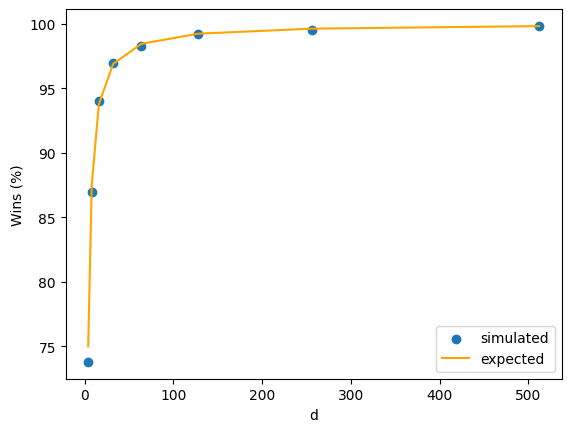

In [11]:
total_doors = [4, 8, 16, 32, 64, 128, 256, 512]
expected_wins = [(1 - (1/d))*100 for d in total_doors]
trials = 5000

wins = []
for d in total_doors:
    goats = d - 1
    game = [cg.InitDoorsRandom(cars=1, goats=goats),
            cg.Pick(),
            cg.Reveal(doors=goats-1),
            cg.Switch()]
    sim = cg.play(game, n=trials, seed=d)
    
    # the get_results() method allows us to save the dictionary of results
    results = sim.get_results()
    wins.append(results['percent_wins'])
    
import matplotlib.pyplot as plt

plt.scatter(total_doors, wins, label='simulated')
plt.plot(total_doors, expected_wins, color='orange', label='expected')
plt.ylabel('Wins (%)')
plt.xlabel('d')
plt.legend()

## 3. Forgetful Monty Hall (three doors)

AKA, "Monty Fall". Here, Monty *doesn't know* which doors have cars or goats.  After the player picks, Monty still reveals a door, picking from the remaining ones *at random*.  He only sees two doors to pick (the currently picked door is omitted), and basically flips a coin to choose between them.

How do we simulate this with cargoat?  We must revisit the `Reveal()` action.  If we look at [its documentation](https://earnestt1234.github.io/cargoat/cargoat/#cargoat.Reveal), there are three `exclude_...` arguments which mark some doors as being off limits for being revealed.  By editing these options, we can simulate what information Monty Hall has, and which doors he randomly picks from.  `exclude_current` prevents any currently revealed doors from being selected again; since Monty only reveals doors once in this game variant, this action is not relevant.  `exclude_picked` prevents doors the player has selected from being revealed, and we still want this to be the case.  But `exclude_cars` needs to change; Monty doesn't know where the cars are, so he should not use that information for deciding which doors to reveal.

Let's try simulating the game with `exclude_cars=False`:

In [12]:
game = [cg.InitDoorsRandom(cars=1, goats=2),
        cg.Pick(),
        cg.Reveal(exclude_cars=False),
        cg.Switch(),
        cg.ShowResults()]

sim = cg.play(game, n=5000, seed=seed)

MontyHallError: Error for step 2: <cargoat.actions.reveal.Reveal object at 0x107a718d0>

**Oh no!!! It's a big nasty error!**

What happened?  The final error tells us that there was a problem with the reveal step:

> `MontyHallError: Error for step 2: <cargoat.actions.reveal.Reveal object at 0x127c4b750>`

While the top error indicates what the real problem is:

> `BadReveal: Cars or picked doors were revealed, e.g. trial 7 door 1. Found for 1699 trial(s):
[   7    9   12 ... 4981 4989 4991]`

There were several trials were a door with a car was revealed.  This is expected, since we added `exlcude_cars=False` to simulate Monty not knowing where the cars are.  Cargoat has thrown an error because the traditional game rules have been violated.  And if Monty truly didn't know where the car is, this should be expected to happen at least some of the time.  In the typical description of this game variant, you are assumed to be on a trial where this violation happened to not take place.  As Untrammeled Mind puts it:

> just as Hall reveals the goat, he says, “Phew, that’s lucky. I’d forgotten where the car was, so I just hoped for the best opened a door at random.”

We are not simulating this situation once, but many many times.  To get around these potential rule violations, cargoat allows us to keep simulating even when some games are spoiled.  To do so, we must also specify `allow_spoiled=True` in `Reveal()`.  Each simulation has a `spoiled` array which keeps track of which games have been spoiled.

In [13]:
game = [cg.InitDoorsRandom(cars=1, goats=2),
        cg.Pick(),
        cg.Reveal(exclude_cars=False, allow_spoiled=True),
        cg.Switch()]

sim = cg.play(game, n=5000, seed=seed)

print(sim.spoiled)
print(sim.spoiled.sum())

[False False False ... False False False]
1699


Now we can look at the results, as before:

In [14]:
game = [cg.InitDoorsRandom(cars=1, goats=2),
        cg.Pick(),
        cg.Reveal(exclude_cars=False, allow_spoiled=True),
        cg.Switch(),
        cg.ShowResults()]

sim = cg.play(game, n=5000, seed=seed)

{'trials': 5000,
 'wins': 1637,
 'losses': 3363,
 'percent_wins': 32.74,
 'percent_losses': 67.25999999999999,
 'spoiled_games': True}


While we have results, they don't match the expected value of $1/2$.  This is because the results are showing the wins for all trials, regardless of if the game was spoiled or not (see the `'spoiled_games'` entry).  We need to also update `ShowResults()` to indicate we only want to count the trials where the game *was not* spoiled.  This models the long-run average results of games where forgetful Monty reveals a door that happens to not contain a car.  `ShowResults()` has a `spoiled_games` argument which allows us to specify how we deal with spoiled games:

In [15]:
game = [cg.InitDoorsRandom(cars=1, goats=2),
        cg.Pick(),
        cg.Reveal(exclude_cars=False, allow_spoiled=True),
        cg.Switch(),
        cg.ShowResults(spoiled_games='omit')]

sim = cg.play(game, n=5000, seed=seed)

{'trials': 3301,
 'wins': 1637,
 'losses': 1664,
 'percent_wins': 49.591033020296884,
 'percent_losses': 50.408966979703116,
 'spoiled_games': False}


And we get the expected result.

## 4. Forgetful Monty Hall (many doors)

This is scenario is very similar to the many door extension of the original problem.  Again, we will not go all the way to one million doors and stay in the hundreds:

In [16]:
total_doors = 100
cars = 1
goats = total_doors - cars

game = [cg.InitDoorsRandom(cars=cars, goats=goats),
        cg.Pick(),
        cg.Reveal(doors=goats - 1, exclude_cars=False, allow_spoiled=True),
        cg.Switch(),
        cg.ShowResults(spoiled_games='omit')]

sim = cg.play(game, n=5000, seed=seed)

{'trials': 103,
 'wins': 51,
 'losses': 52,
 'percent_wins': 49.51456310679612,
 'percent_losses': 50.48543689320388,
 'spoiled_games': False}


We still see the expected win rate of $1/2$ when just looking at unspoiled games.  Remember, we assume to be modeling an instance where Monty, not knowing where the car is, has successfully opened 98 doors without revealing the car.  Given you find yourself in this situation, the choice to switch or stay does not matter.  A key point, though, is that that finding yourself in that situation is, in a sense, very unlikely!  Out of 5,000 trials, only about one hundred were unspoiled.  By looking at the number of successful trials, we can see that as the number of doors increases, it gets more and more unlikely for forgetful Monty to reveal only goats by chance:

In [17]:
def forgetful_monty_hall(total_doors):
    cars = 1
    goats = total_doors - cars

    game = [cg.InitDoorsRandom(cars=cars, goats=goats),
            cg.Pick(),
            cg.Reveal(doors=goats - 1, exclude_cars=False, allow_spoiled=True),
            cg.Switch(),
            cg.ShowResults(spoiled_games='omit')]

    sim = cg.play(game, n=15000, seed=seed)
    
forgetful_monty_hall(100)
forgetful_monty_hall(200)
forgetful_monty_hall(300)

{'trials': 302,
 'wins': 158,
 'losses': 144,
 'percent_wins': 52.317880794701985,
 'percent_losses': 47.682119205298015,
 'spoiled_games': False}
{'trials': 169,
 'wins': 90,
 'losses': 79,
 'percent_wins': 53.25443786982249,
 'percent_losses': 46.74556213017752,
 'spoiled_games': False}
{'trials': 102,
 'wins': 47,
 'losses': 55,
 'percent_wins': 46.07843137254902,
 'percent_losses': 53.92156862745098,
 'spoiled_games': False}


## 5. Lazy Monty Hall (three doors)

This is an interesting one.  Again assume there are three doors with one car and two goats, placed randomly.  You pick door 1.  Monty reveals a door containing a goat.  If Monty Hall doesn't have a choice of door to open (i.e., the goat is not behind door 1), he will reveal the only goat he can.  However, if Monty has a choice between opening door 2 and 3 (i.e., you the car is behind door 1), he will open door 2 with a probability of $3/4$, otherwise opening door 3.

Now, you see Monty Hall open door 2 - should you switch to door 3 or remain with door 1?

Untrammeled Mind arrives at the conclusion that switching here wins with probability $4/7$, an decrease from $2/3$ in the original problem (though still the better than staying).  To simulate this, we will update our game to have the player pick the first door explicitly, rather than a random door (as we did above).  We will also update the reveal step with door probabilities:

In [18]:
game = [cg.InitDoorsRandom(cars=1, goats=2),
        cg.Pick(doors=[0]),
        cg.Reveal(doors=[0, 3/4, 1/4], weighted=True),
        cg.Switch()]

In the `Pick` step, we specify `doors=[0]` to pick the door at index 0.

In the `Reveal` step, we use `weighted=True` to indicate the argument passed to `doors` signify probabilities of revealing each door.  In this case, we explicitly give a value for each door.  Because the `exclude_...` arguments apply, this single set of probabilities will cover all the behaviors we want.  In trials where Monty has a choice between door 2 and 3, the `3/4` and `1/4` probabilities will be applied.  Otherwise, if Monty does not have a choice, `exclude_cars=True` will effectively zero the probability on the door containing a car.  The probabilities are automatically normalized to sum to one, ensuring the single goat door available to Monty is opened.

Finally, recall that we are conditioning on the fact that Monty has opened door 2 - thus, we need to filter our results to only include such trials.  `ShowResults` has a `condition` parameter which allows us to do so.  It is (by default) called on the simulation object, and expected to compute a 1D boolean array indicating which trials to include:

In [19]:
game = game + [cg.ShowResults(condition=lambda sim: sim.revealed[:, 1] == 1)]

sim = cg.play(game, n=5000, seed=seed)

{'trials': 2897,
 'wins': 1665,
 'losses': 1232,
 'percent_wins': 57.47324818778047,
 'percent_losses': 42.52675181221954,
 'spoiled_games': False}


## 6. Monty Hall Has a Tell (three doors)

In this final scenario, we will enlist a few more tricks to create our game simulation.  Here, Monty Hall has a "tell": on 95% of trials where the player has picked the door with the car, Monty will arch his eye brows 3 times.  However, he also does this eye arching behavior on 10% of trials where a goat is initially picked.

Assume that you pick a door and then see Monty's tell; is switching still the best option?

To model this situation, we need to simulate and keep track of trials where Monty has a tell.  This is not a feature that cargoat tracks, so we need to get a little creative.  Let's first create a boolean array which will keep track of tells.  We will start with a very small number of trials:

In [20]:
import numpy as np

n = 10
tell = np.zeros(n, dtype=bool)
print(tell)

[False False False False False False False False False False]


The array is initialized as all `False`, indicating no tells yet.  How do we interact with `tell` from inside of a Monty Hall simulation?  We can simply add any custom function to our game (all cargoat actions implement their behaviors through the `__call__()` method).  This toy example shows this notion:


In [21]:
x = []

game = [lambda sim : x.append('a')]

print(x)
cg.play(game, n=10)
print(x)

[]
['a']


In the above, the list `x` is modified because the `lambda` function gets called with `cg.play()`.  We can use very similar logic for updating `tell`.

However, we need to modify `tell` in a conditional manner.  That is, the rate of Monty's tell is dependent on whether or not the player has selected a door containing the car.  To manage this, we will use [`IfElse`](https://earnestt1234.github.io/cargoat/cargoat/#cargoat.IfElse), which allows us to conditionally select actions to perform.

We can construct a function to update the `tell` array with the expected amount of tells by Monty.  On trials where we have picked the car, we should observe the tell 95% of the time.  While on trials where we haven't picked the car, we should see the tell 10% of the time.  To help with this, we can make use of an esoteric feature of `IfElse`: during evaluation of the condition, this class will temporarily attach an `_ifelse_index` attribute.  This is a boolean array which marks which the condition evaluation across trials. 

In [22]:
game = [cg.InitDoorsRandom(),
        cg.IfElse(condition=lambda sim: sim.cars[:, 2],
                  a=lambda sim: print(sim._ifelse_index),
                  b=lambda sim: print(sim._ifelse_index))]

sim = cg.play(game, n=10, seed=seed)
sim.cars

[ True False False False False False False False  True False]
[False  True  True  True  True  True  True  True False  True]


array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0]])

In the above example, the condition we evaluated was a car being in the third door (index 2).  In the "if" action (`a`), we print the boolean index of trials where that condition is satisfied, while in the "else" condition (`b`), we print the index of trials where the condition is not met.

With all this, we can finally create the simulation.  We create a function which uses the `_ifelse_index` and a random number generator to mark trials as having the tell or not.  We then subset our result to only include trials where the tell is observed.

In [23]:
n = 10000
tell = np.zeros(n, dtype=bool)

def set_tell(positions, p=0.5):
    # flip a coin for all trials
    draws = np.random.binomial(n=1, p=p, size=len(positions))
    
    # take an and between the trial condition and the draws
    tell_seen = positions & draws.astype(bool)
    
    # update `tell` accordingly
    tell[positions] = tell_seen[positions]

game = [cg.InitDoorsRandom(),
        cg.Pick(),
        cg.IfElse(lambda sim: np.any(sim.picked & sim.cars, axis=1),
                  lambda sim: set_tell(sim._ifelse_index, p=0.95),
                  lambda sim: set_tell(sim._ifelse_index, p=.1)),
        cg.Stay()]

sim = cg.play(game, n=n, seed=seed)
sim.get_results(condition=tell)

{'trials': 3910,
 'wins': 3230,
 'losses': 680,
 'percent_wins': 82.6086956521739,
 'percent_losses': 17.391304347826086,
 'spoiled_games': False}

Staying performs much better here!  The tell is a strong indication that we have already selected a door with the car.

## Wrap up

This post has shown how to simulate several common Monty Hall variations with cargoat.  There are many more situations that can be explored: having more than one car, picking doors with probabilities, applying different actions on different trials, etc.  Hopefully, cargoat can be a useful (or at least fun) tool for exploring these and testing your analytical conclusions!

If you notice any issues with this documentation or cargoat in general, please share them on the [issues page](https://github.com/earnestt1234/cargoat/issues).